### Model evaluation. Confusion matrix and performance measures

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../data/sms/SMSSpamCollection', header=None, sep='\t', names=['Label', 'SMS'])

In [3]:
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape

((4457, 2), (1115, 2))

In [5]:
from nbc import NBCtext

In [6]:
_nbc = NBCtext()

In [7]:
_nbc.fit(X_train[['SMS', 'Label']])

In [8]:
X_test['predict'] = X_test.SMS.apply(lambda x: _nbc.predict(x, alpha = 1, soft = False))

In [9]:
pd.concat((X_test.groupby('Label').predict.value_counts(), X_test.groupby('Label').predict.value_counts(normalize = True)), axis = 1)

predict   predict
Label predict                   
ham   ham          957  0.994802
      spam           5  0.005198
spam  spam         141  0.921569
      ham           12  0.078431

### Confusion Matrix for binary classification

<div>
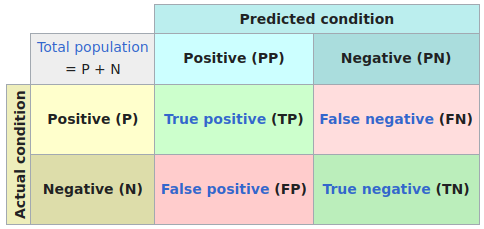
</div>


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

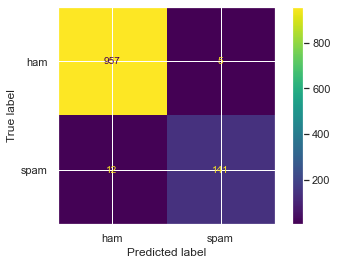

In [11]:
ConfusionMatrixDisplay.from_predictions(X_test.Label, X_test.predict)

#### improved confusion matrix visualization

In [12]:
sns.set_theme(context = 'notebook', style = "white", font_scale = 1.0)

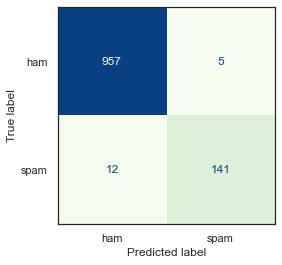

In [13]:
_, axs = plt.subplots(1, 1, figsize = (4, 4))
ConfusionMatrixDisplay.from_predictions(
    X_test.Label,
    X_test.predict,
    ax = axs,
    colorbar = False,
    cmap = 'GnBu');

###  Performance measures for binary classification

- **Accuracy**: proportion of correctly predicted examples,

$$Acc=\frac{TP+TN}{P+N}=\frac{TP+TN}{TP+FN+FP+TN}$$

In [14]:
X_test[X_test.Label == X_test.predict].Label.count() /X_test.shape[0]

0.9847533632286996

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(X_test.Label, X_test.predict)

0.9847533632286996

- **Recall**: fraction of positive examples correctly predicted as positives (it is a measure of *quantity*, also called **sensitivity** or **true positive rate**)

$$Recall=\frac{TP}{P}=\frac{TP}{TP+FN}$$

- **Precision**: fraction of predicted positive examples wich are actually positive (it is a measure of *quality* of the prediction)

$$Precision=\frac{TP}{PP}=\frac{TP}{TP+FP}$$

- **$F_1$ score**: An average measure of performance taking into account both, *Recall* and *Precision* (harmonic mean of *Recall* and *Precision*, ex. the harmonic mean is zero whenever $Precision=0$ or $Recall=0$ while a classifier with $Precision=1$ and $Recall=0$ has an arithmetic mean of 0.5). 

$$F_1=\frac{2\,Recall\,Precision}{Recall+Precision}=\frac{2\,TP}{2\,TP+FP+FN}$$

In [16]:
from sklearn.metrics import precision_recall_fscore_support as prf

In [17]:
prf(X_test.Label, X_test.predict)

(array([0.9876161 , 0.96575342]),
 array([0.99480249, 0.92156863]),
 array([0.99119627, 0.94314381]),
 array([962, 153]))

##### Averaged performance measures

- **macro-average**

performance metrics are computed independently for each class and averaged afterwards (hence all classes have the same weight in the average)

In [18]:
prc, rcl, f1, sup = prf(X_test.Label, X_test.predict, average = 'macro')
print('+++ average performance measures')
print('Precision  %6.4f' %prc)
print('Recall     %6.4f' %rcl)
print('f_score    %6.4f' %f1)
print('Suppport   %s' %sup)

+++ average performance measures
Precision  0.9767
Recall     0.9582
f_score    0.9672
Suppport   None


- **micro-average**

performance metrics are computed by aggregating the contributions of all classes (hence preferable in case of class imbalance), in this case *recall*, *precision* and *$F_1$score* are all equal, i.e.

$$\text{microRecall}=\frac{\sum_c\,TP_c}{\sum_c\,P_c}\;\equiv\;\text{microPrecision}=\frac{\sum_c\,TP_c}{\sum_c\,PP_c}\;\equiv\;\text{micro}F_1$$

- **weighted-average**

performance metrics are computed by weighting the contributions of all classes (also preferable in case of class imbalance), e.g.

$$\text{microRecall}=\sum_c\frac{n_c}{n}\,\frac{TP_c}{P_c}\,,\; \text{microPrecision}=\sum_c\frac{n_c}{n}\,\frac{TP_c}{PP_c}$$

In [19]:
avrgs = ['macro', 'micro', 'weighted']
pd.DataFrame([prf(X_test.Label, X_test.predict, average = mode)[:3] for mode in avrgs], columns = ['precision', 'recall', 'f-score'], index = avrgs)

,precision,recall,f-score
macro,0.976685,0.958186,0.967170
micro,0.984753,0.984753,0.984753
weighted,0.984616,0.984753,0.984603
